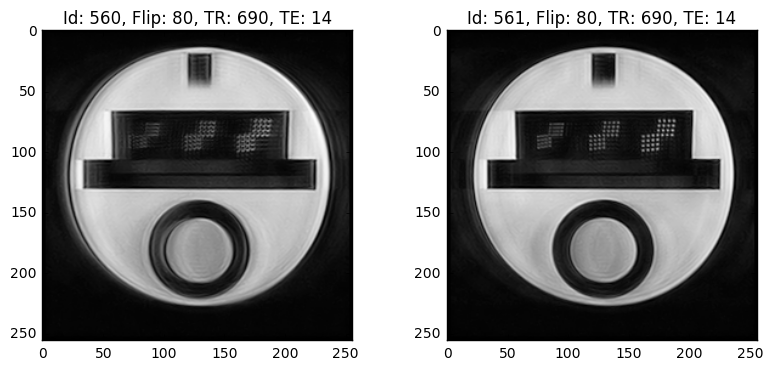

In [2]:
from pylab import *
from scipy.optimize import curve_fit
import dicom as dc
import pylab
import matplotlib.pyplot as plt
from collections import defaultdict
import os
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

#files=glob.glob('data/MR_2016-08-03_160844_IRM.ABDOMEN.SUP.(FOIE,RATE,REINS)_t1.vibe.dixon.tra.caipi4.bh.320.opp_n96__00000/*.dcm')
dicoms = {}

for root, dirs, files in os.walk("./data_dresden_2"):
    for name in files:
        if name.endswith(".DCM"):
            dicom=dc.read_file(os.path.join(root, name))
            dicoms[dicom.SeriesNumber]=dicom
for index, item in enumerate(dicoms):
    if (index==100):
        break
    if (index%4==0): 
        fig = plt.figure()
        fig.set_figwidth(20)
    
    a=fig.add_subplot(1,4,index%4+1)
    dicom=dicoms[item]
    a.set_title("Id: {0}, Flip: {1}, TR: {2}, TE: {3}".format(dicom.SeriesNumber, dicom.FlipAngle, int(dicom.RepetitionTime), int(dicom.EchoTime)))
    imgplot = plt.imshow(dicom.pixel_array, cmap="Greys_r")
    
pylab.show()

In [71]:
selected_items=range(185,192)
sums_temp=[]
features_temp=[]
for id in selected_items:
    zoi=dicoms[id].pixel_array[100:150,120:150].copy()
    sums_temp.append(zoi.sum())
    features_temp.append(dicoms[id].EchoTime)

sums=np.asarray(sums_temp)
features=np.asarray(features_temp)
    

In [72]:
#Scaling
max_value=np.max(sums)
min_value=np.min(sums)
sums=(sums-min_value)/(max_value-min_value)

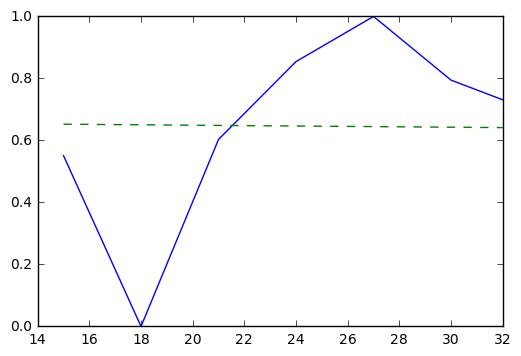

[  6.62285910e-01   1.00000000e+03]


In [73]:

def decreasing_exponential(x, A,T):
    return A*exp(-(x/T))

popt, pcov = curve_fit(decreasing_exponential, features, sums, bounds=([0,0], [20, 1000]))
decreasing_exponential(sums, *popt)

fig = plt.figure()
plt.plot(features, sums)
plt.plot(features, decreasing_exponential(features, *popt), 'g--', label='fit-with-bounds')
plt.show()

print(popt)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>


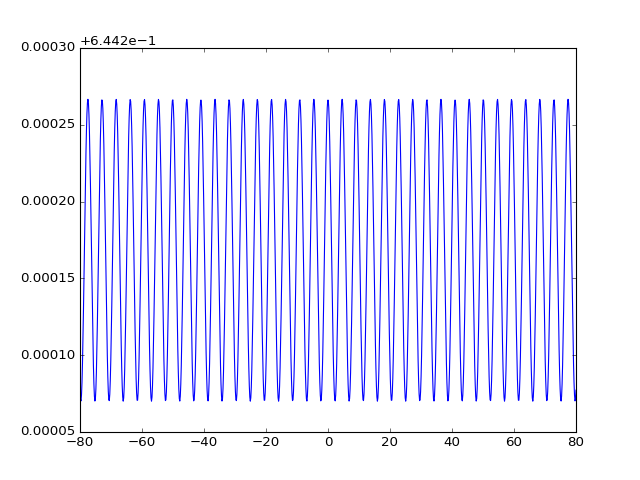

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [20]:
#Libary loading
import numpy as np
import numpy.linalg as la
import math
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex, HTML
from mpl_toolkits.mplot3d import Axes3D
from pt_mri.simulator.Simulator import Simulator
from pt_mri.simulator.MatrixGenerator import MatrixGenerator
from pt_mri.simulator.Flip import Flip
from pt_mri.simulator.FreePrecess import FreePrecess
from pt_mri.simulator.SteadyState import SteadyState
import random
import cmath

%matplotlib notebook
%load_ext autoreload
%autoreload 2

plt.rcParams.update({'figure.max_open_warning': 0})

matrix_generator=MatrixGenerator()

T1 = 600 #ms.
T2 = 100 #ms.
TEs = 14 #ms.
TR = 690 #ms.
flip = 80/180*math.pi #rad
dfs = np.linspace(-80,80,num=1000) #Hz
main_frequency=0.22*42.57747892 #MHz

result=np.zeros(len(dfs),dtype=np.complex)

for index_df, df in enumerate(dfs):
    [M, M_transverse]=SteadyState().sssignal(flip,T1,T2,TE,TR,df*main_frequency)
    result[index_df]=M_transverse

plt.figure()
plt.subplot(2,1,1)

plt.ylabel("Norm of the transverse\ncomponent (signal)")
plt.xlabel("delta-frequency (ppm)")

plt.subplot(1,1,1)
plt.plot(dfs,np.abs(result))
plt.legend()
plt.show()
sspf_for_te_0=result[0]